In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from scipy import stats, linalg
 
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
 
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i + 1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
 
            res_j = C[:, j] - C[:, idx].dot(beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
 
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
 
    return P_corr

In [20]:
df = pd.read_csv('/Users/rockyauer/Downloads/Untitled Folder/a1_data.csv')
print(len(df.columns))
df

11


,A,B,C,D,E,F,G,H,I,J,K
0,3.179665,3.030625,3.222752,2.836624,3.386284,1.910165,2.179628,3.464657,3.705143,3.921797,3.566766
1,3.313155,3.127535,3.367189,2.799483,2.527001,2.359419,2.461049,3.394200,3.002324,3.487035,3.753581
2,3.531847,3.554489,3.441636,2.582776,2.730851,2.263097,2.461049,3.452962,3.531599,3.773342,3.254741
3,3.621384,3.828081,3.640896,2.704508,1.727649,1.855651,2.021082,3.570291,3.611415,3.725917,3.328318
4,3.285691,3.206716,2.992451,2.562289,3.011359,2.414187,2.612864,3.331957,3.143080,3.679484,3.874796
...,...,...,...,...,...,...,...,...,...,...,...
11667,3.793141,3.921324,3.895300,3.000136,2.883361,2.333931,2.847800,3.898225,2.699285,1.123815,2.824223
11668,3.469416,3.491603,3.629846,2.898924,2.700522,2.953265,3.093751,3.804530,2.699285,1.707091,2.824223
11669,3.550766,3.480149,3.653584,2.859884,2.535938,1.754421,2.606183,3.703122,2.699285,0.963030,3.125252
11670,3.641136,3.679161,3.137581,2.870503,2.706313,2.773593,2.882737,3.749889,4.347643,3.855321,3.211612


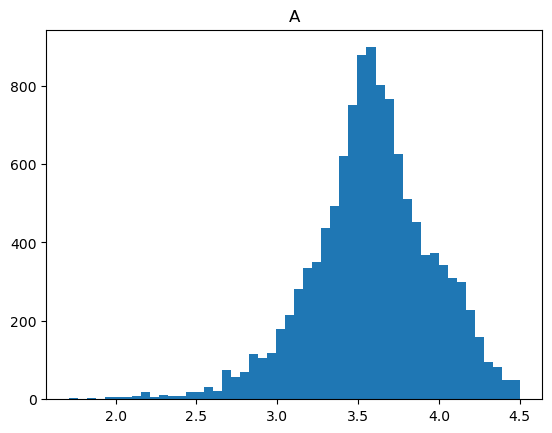

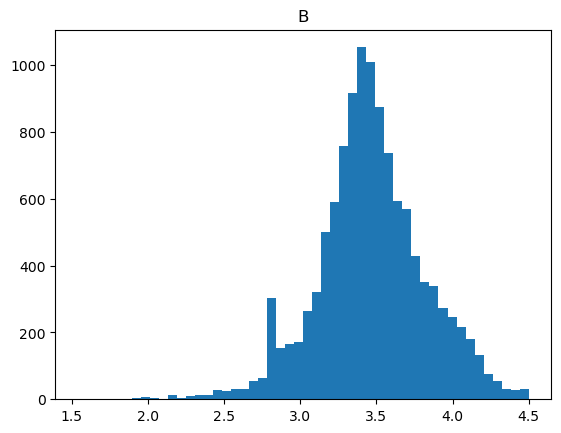

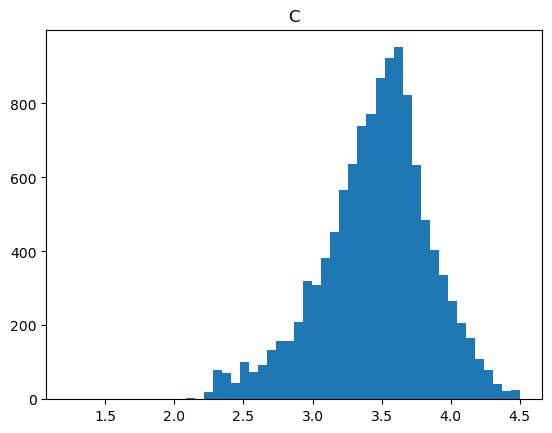

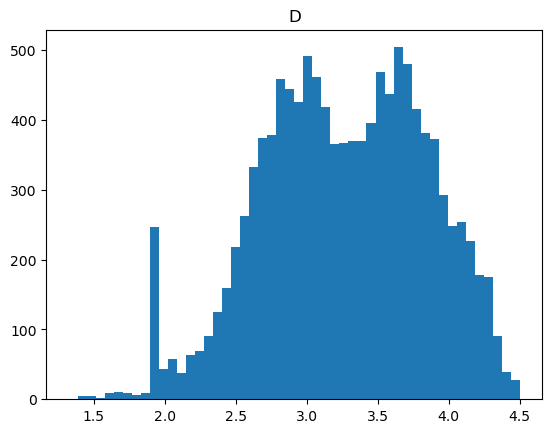

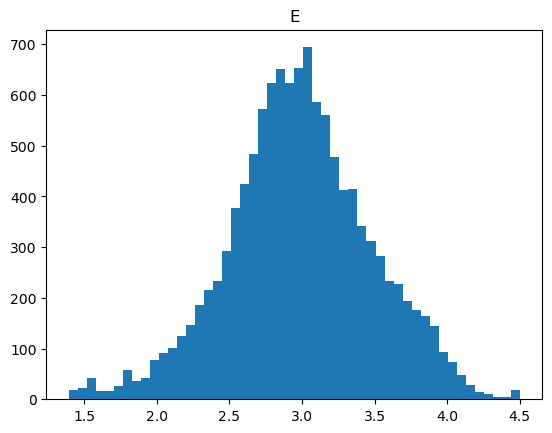

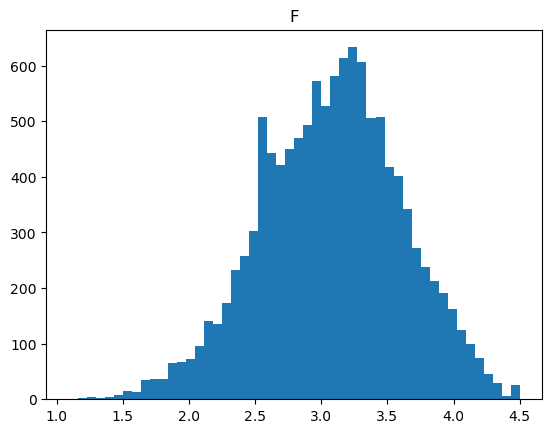

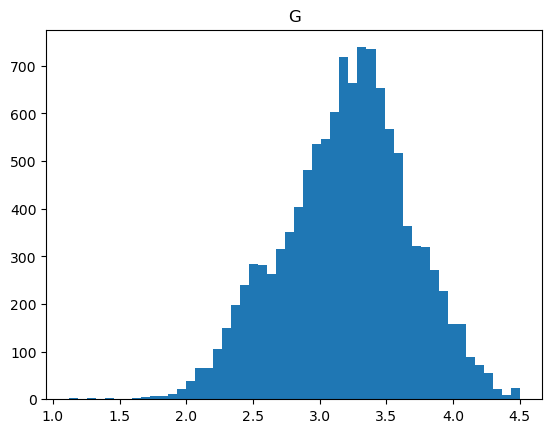

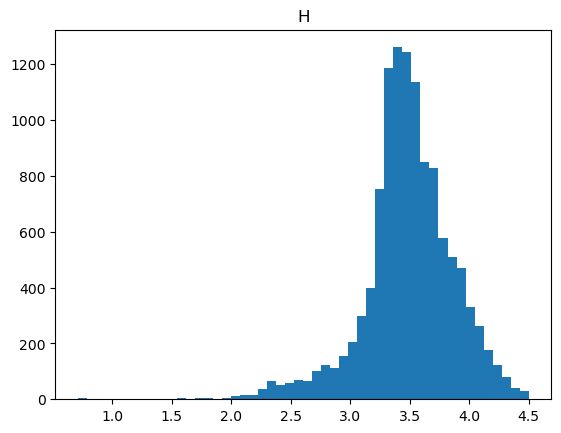

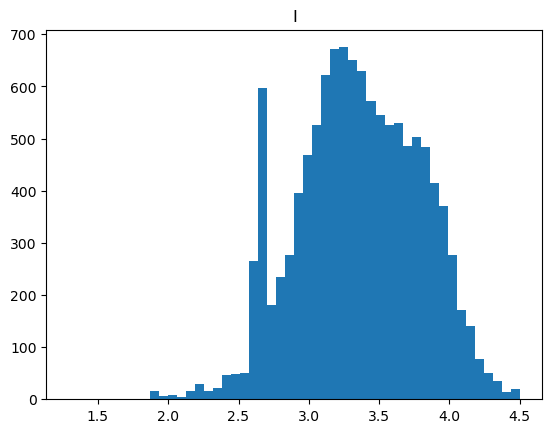

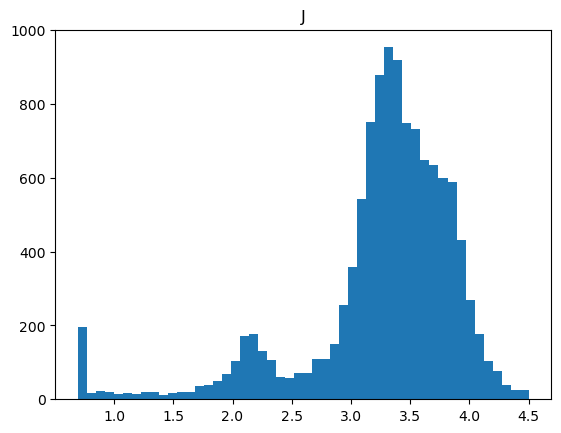

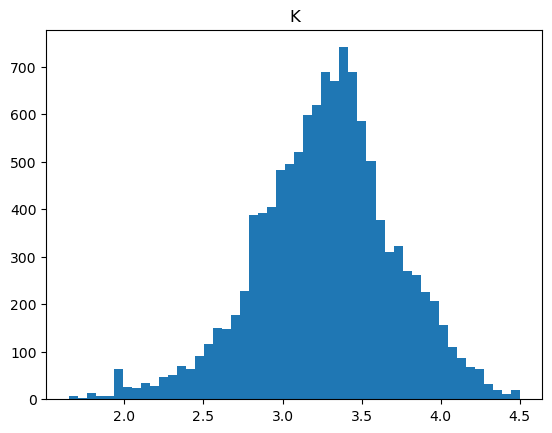

{'A': 3.581854841247797, 'B': 3.463646933965193, 'C': 3.4529826690151735, 'D': 3.2604015077228903, 'E': 2.984952947542972, 'F': 3.0758230635698185, 'G': 3.197797482275235, 'H': 3.4871017507906616, 'I': 3.3515924744320107, 'J': 3.2583391451311297, 'K': 3.2748243132351087}
{'A': 0.1431584275785621, 'B': 0.12520016223725194, 'C': 0.15657215532603044, 'D': 0.3339508126673893, 'E': 0.24237846613389513, 'F': 0.2834368313239464, 'G': 0.22759312901357162, 'H': 0.14544552958063411, 'I': 0.18857519161199032, 'J': 0.4327904659358988, 'K': 0.19064852502553808}


<Figure size 640x480 with 0 Axes>

In [21]:
# plotting the histograms
means = {}
var = {}
for i in df.columns:
    plt.hist(x=df[i], bins=50)
    plt.title(i)
    plt.show()
    means[i] = np.mean(df[i])
    var[i] = np.var(df[i])

plt.tight_layout()
print(means)
print(var)

In [22]:
df_mean = pd.DataFrame.from_dict(means, orient='index', columns=['mean'])
df_vars = pd.DataFrame.from_dict(var, orient='index', columns=['variance'])
df_overview = pd.concat([df_mean, df_vars], axis=1)

df_overview

,mean,variance
A,3.581855,0.143158
B,3.463647,0.125200
C,3.452983,0.156572
D,3.260402,0.333951
E,2.984953,0.242378
F,3.075823,0.283437
G,3.197797,0.227593
H,3.487102,0.145446
I,3.351592,0.188575
J,3.258339,0.432790


based on the calculated means, variances and the plotted histograms we can assume of the different columns we can assume that all of the different distribution follow a normal distribution N(mu_i, sigma^2_i)

In [23]:
cov_matrix = df.cov()

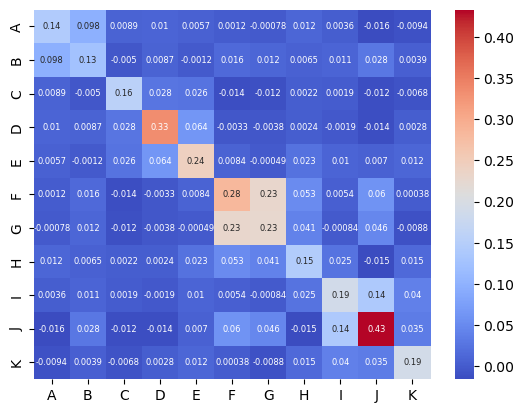

<Figure size 640x480 with 0 Axes>

In [24]:
# covariance matrix
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt='.2g', annot_kws={"fontsize":6})
plt.show()
plt.tight_layout()

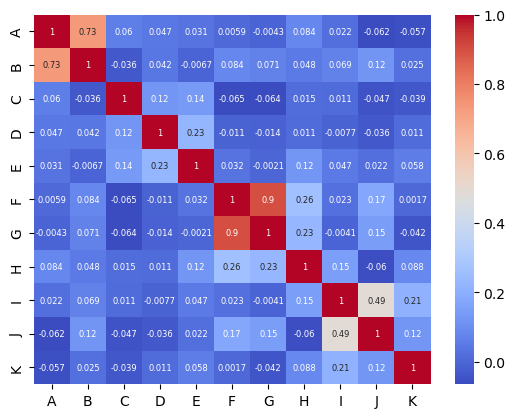

In [25]:
#correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"fontsize":6})
plt.show()

/var/folders/hs/bj7tktjn0zsclds6m9zy5t4m0000gn/T/ipykernel_44000/218106763.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  P_corr = np.zeros((p, p), dtype=np.float)
/var/folders/hs/bj7tktjn0zsclds6m9zy5t4m0000gn/T/ipykernel_44000/218106763.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.ones(p, dtype=np.bool)


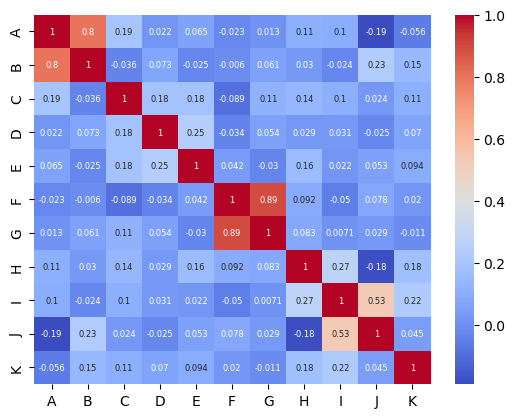

In [27]:
partial_cr = pd.DataFrame(partial_corr(df))
partial_cr.columns = corr_matrix.columns
partial_cr.index = corr_matrix.index
sns.heatmap(partial_cr, annot=True, cmap='coolwarm', annot_kws={"fontsize":6})
plt.show()

judging from the covariance and correlation matrix the variances of the distributions differ a bit. The correlation between some of the variables is very strong to mild ((F,G), (A,B) and (I,J))

In [ ]:
from scipy.stats import ttest_ind
insignificant = []
significant = []
# testing the depend
for i in df.columns:
    for j in df.columns:
        t_statistic, p_value = ttest_ind(df[i], df[j])
        print(t_statistic)
        print(p_value)
        if p_value > 0.05 and i!=j:
            significant.append((i,j))
        else:
            insignificant.append((i,j))
print('significant: ', significant)
print('NOT significant: ', insignificant)